## Wykresy danych.
### 1. Tworzenie wykresu za pomocą matplotlib

Do rysowania różnego rodzaju wykresów przydatne będą możliwości biblioteki matplotlib.

Poniższy przykład przedstawia import wymaganych bibliotek oraz danych zewnętrznych.

In [2]:
#import bibliotek i danych
import pandas as pd
import matplotlib.pyplot as pl

In [10]:
dane = pd.read_csv("DanePogodowe2021.csv", sep=";", decimal=".")

     Temperatura  Wiatr
0           -2.8    5.7
1           -1.9    8.0
2           -0.5    8.0
3            0.3    8.0
4           -0.2    8.0
..           ...    ...
360         -9.6    1.7
361         -2.7    6.0
362          2.9    8.0
363          6.3    7.7
364         10.5    7.0

[365 rows x 2 columns]


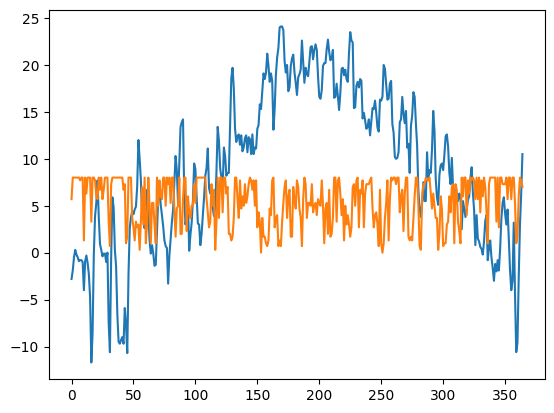

In [11]:
tmp_wind = dane.loc[:,['Temperatura','Wiatr']]
print(tmp_wind)

pl.plot(tmp_wind)
pl.show()


### Formatowanie obszaru wykresu

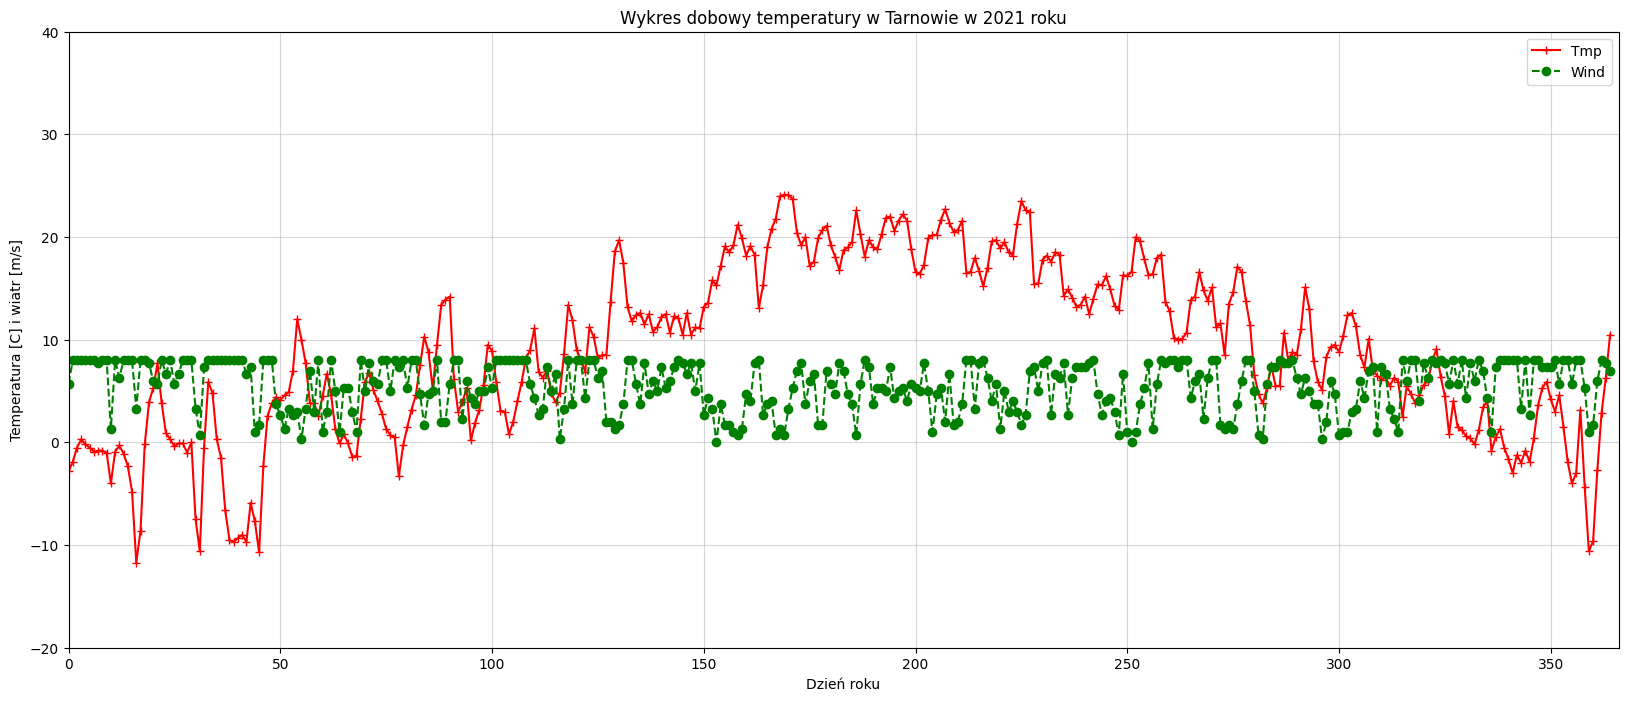

In [12]:
Tmp = dane.loc[:,['Temperatura']]
Wnd = dane.loc[:,['Wiatr']]

pl.figure(figsize=[20,8])
pl.title("Wykres dobowy temperatury w Tarnowie w 2021 roku")
pl.xlabel('Dzień roku')
pl.ylabel("Temperatura [C] i wiatr [m/s]")
pl.axis([0,366,-20,40])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.plot(Tmp,'-r+')
pl.plot(Wnd,'--go')
pl.legend(["Tmp","Wind"])

pl.show()

### Dwa wykresy na osobnych osiach Y

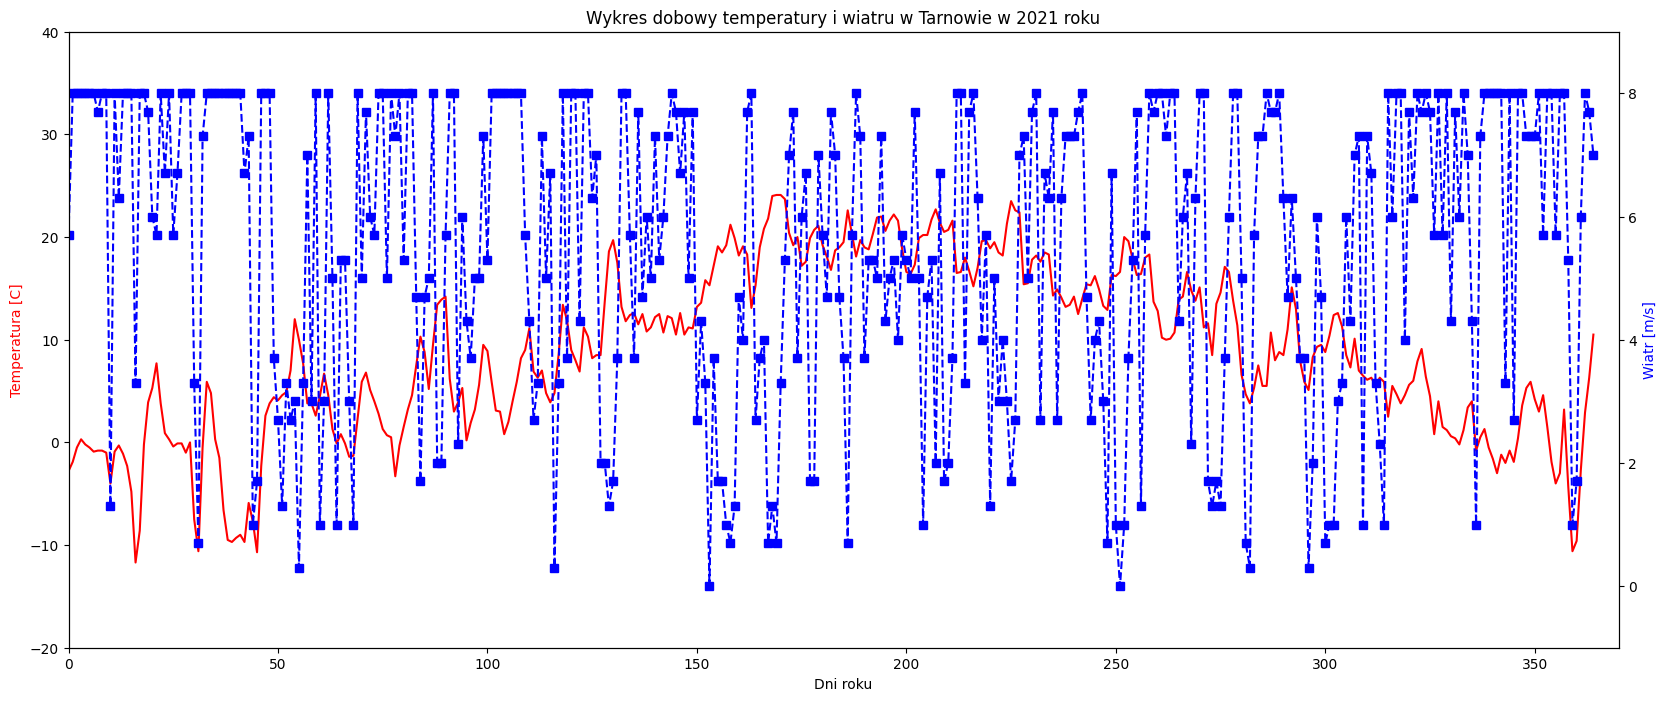

In [13]:
Tmp = dane.loc[:,'Temperatura']
Wnd = dane.loc[:,'Wiatr']

fig, axis1 = pl.subplots(figsize=(20,8)) 

axis1.set_title("Wykres dobowy temperatury i wiatru w Tarnowie w 2021 roku")
axis1.set_xlabel('Dni roku') 
axis1.set_ylabel('Temperatura [C]', color = 'red') 
axis1.plot(Tmp, 'r') 
axis1.axis([0,370,-20,40])

axis2 = axis1.twinx() 
axis2.axis([0,370,-1,9]) 
axis2.set_ylabel('Wiatr [m/s]', color = 'blue') 
axis2.plot(Wnd, '--bs') 

pl.show()


### Przykład (funkcja liniowa i kwadratowa)

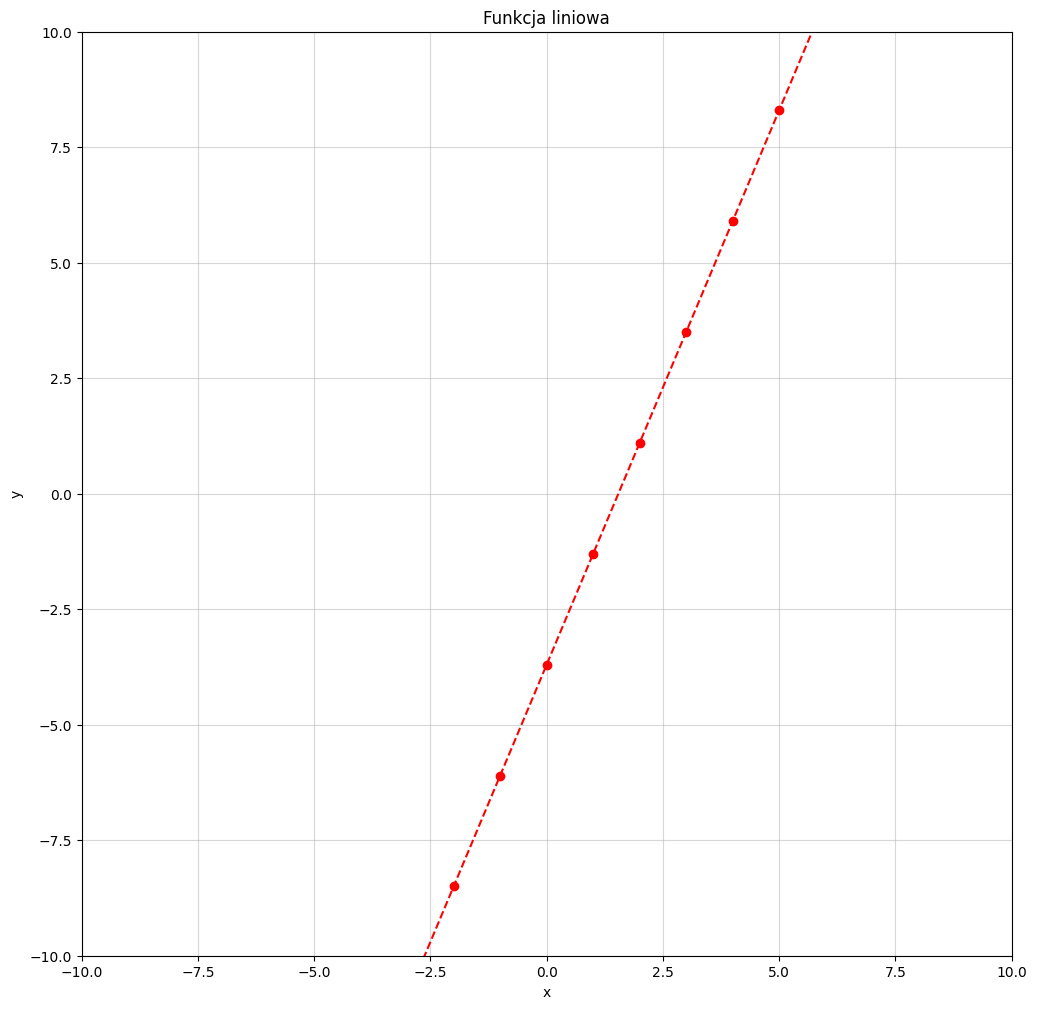

In [14]:
x = range(-10,10)
a = 2.4
b = -3.7
#a = float(input('Podaj a '))
#b = float(input('Podaj b '))
y = []
for xi in x:
  y.append(a*xi+b)


pl.figure(figsize=[12,12])
pl.title("Funkcja liniowa")
pl.xlabel('x')
pl.ylabel("y")
pl.axis([-10,10,-10,10])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.plot(x,y,'--ro')
pl.show()

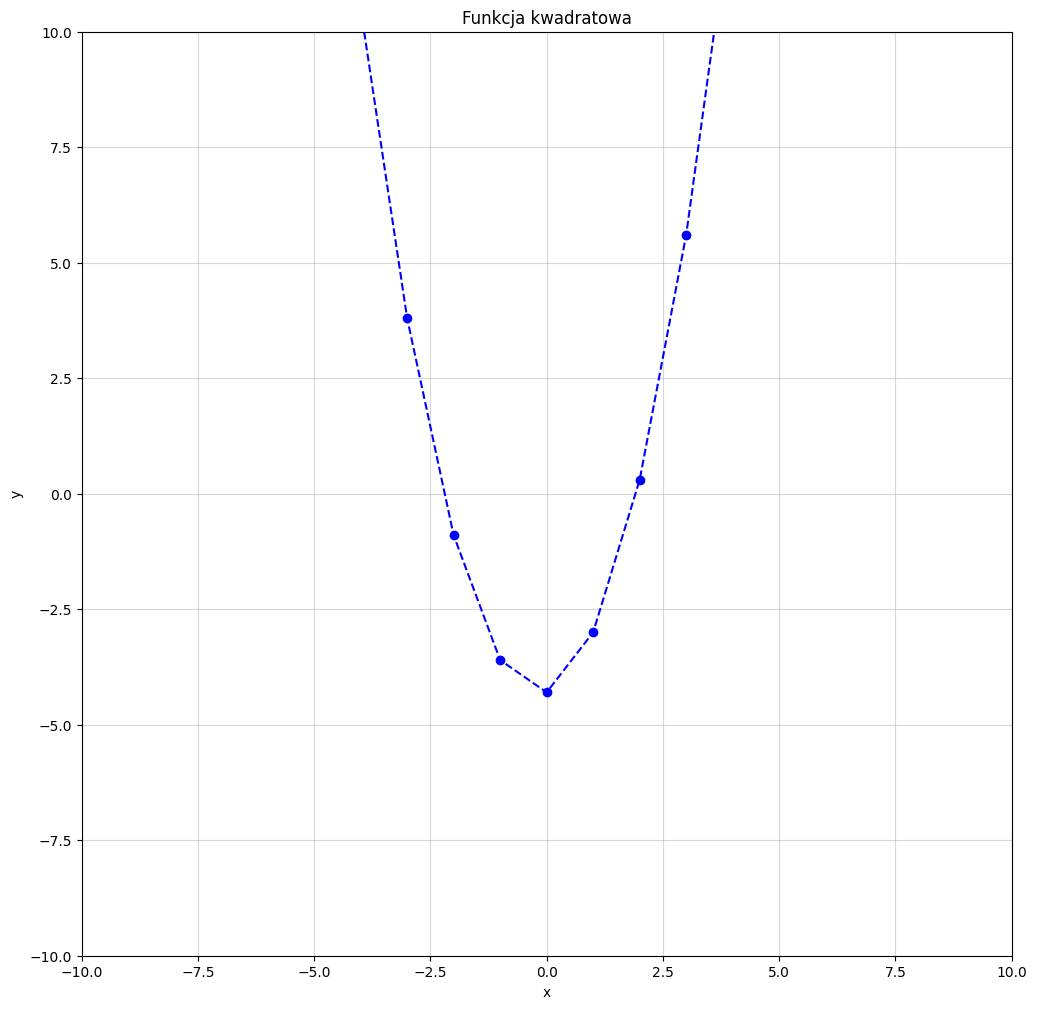

In [15]:
x = range(-10,10)
a = 1.0
b = .3
c = -4.3
#a = float(input('Podaj a '))
#b = float(input('Podaj b '))
#c = float(input('Podaj c '))
y = []
for xi in x:
  y.append(a*xi*xi+b*xi+c)


pl.figure(figsize=[12,12])
pl.title("Funkcja kwadratowa")
pl.xlabel('x')
pl.ylabel("y")
pl.axis([-10,10,-10,10])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.plot(x,y,'--bo')
pl.show()

### Rysowanie wykresów - pandas i matplotlib:
- wykres pudełkowy
- wykres punktowy
- wykres bąbelkowy
- histogram
- kołowy

Wykresy można rysować przy użyciu biblioteki matplotlib (tak jak w powyższych przykładach) albo korzystać z dedykowanej metody plot biblioteki pandas. 

### Wykres pudełkowy:
Wykres przedstawia rozkład jakiejść cechy statystycznej. 

Budowa: 
- dolna krawędź odcinka (najczęściej najmniejsza wartość), 
- górna krawędź odcinka (najczęściej najwyższa wartość), 
- dolna krawędź pudełka (pierwszy kwartyl - 25% danych położona jest poniżej)
- górna krawędź pudełka (trzeci kwartyl - 25% danych położona jest powyżej)
- wysokość pudełka (rozstęp ćwiartkowy, drugi kwartyl - 50% danych)
- zielona linia - mediana


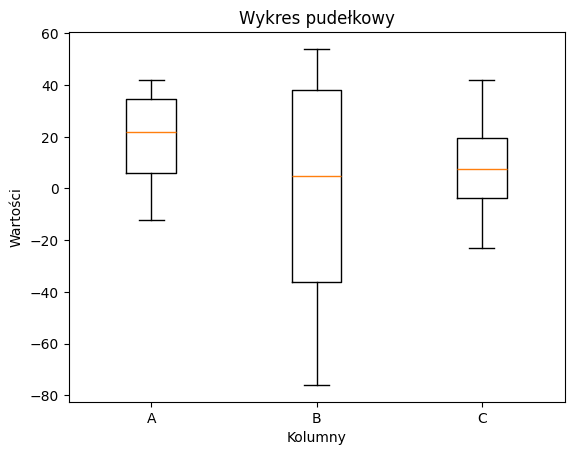

In [28]:
dataFrame = pd.DataFrame({"A": [-12,32,12,42], "B": [33,-23,54,-76], "C": [12,3,42,-23]})

# dataFrame.plot.box(grid='True',figsize=(10,7))
pl.boxplot(dataFrame, tick_labels=dataFrame.columns)
pl.title("Wykres pudełkowy")
pl.xlabel("Kolumny")
pl.ylabel("Wartości")
pl.show()

### Wykres punktowy

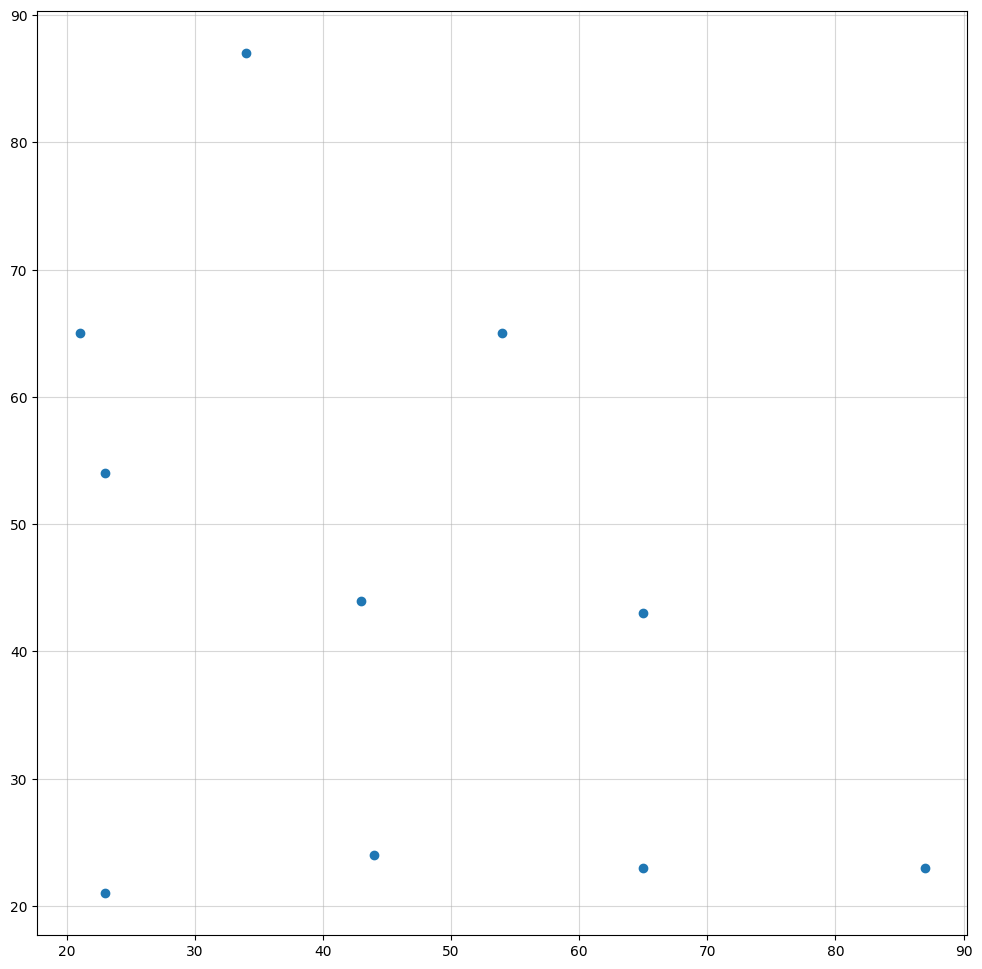

In [29]:
data = {
    "y": [23,44,21,54,24,65,65,87,43,23],
    "x": [87,43,23,23,44,21,54,34,65,65]   
}

pl.figure(figsize=[12,12])
pl.grid(True,which="both",axis="both",alpha=.5)
pl.scatter(data["x"],data["y"])
pl.show()

# dataFrame = pd.DataFrame(data)
# dataFrame.plot.scatter(x='x', y='y',grid = True,figsize = (12,12))

### Wykres bąbelkowy (punktowy)


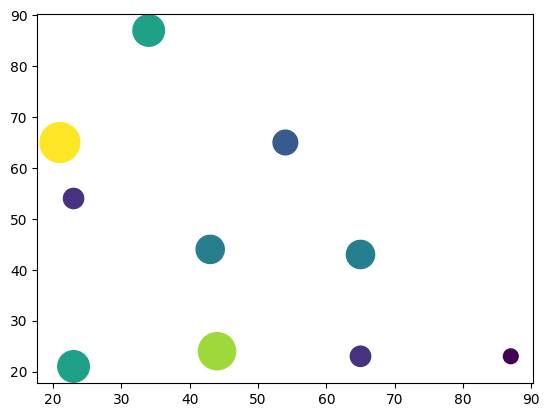

In [30]:

data = {
    "y": [23,44,21,54,24,65,65,87,43,23],
    "x": [87,43,23,23,44,21,54,34,65,65],
    "v": [112,412,516,212,715,819,315,516,412,214]   
}

pl.scatter(data["x"],data["y"],data["v"],c=data["v"])
pl.show()

### Histogram

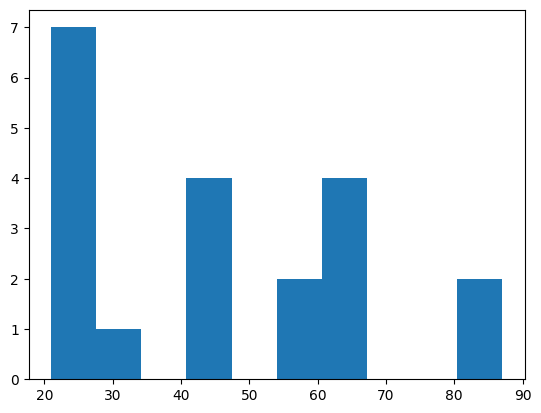

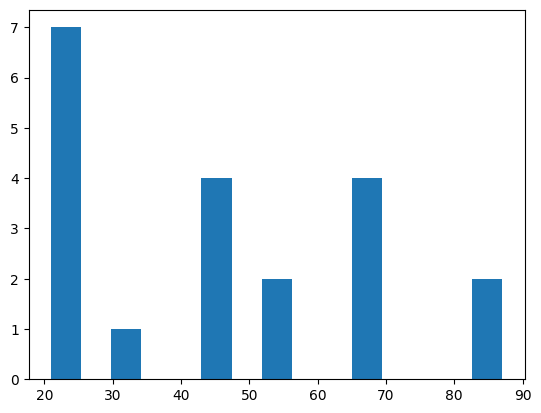

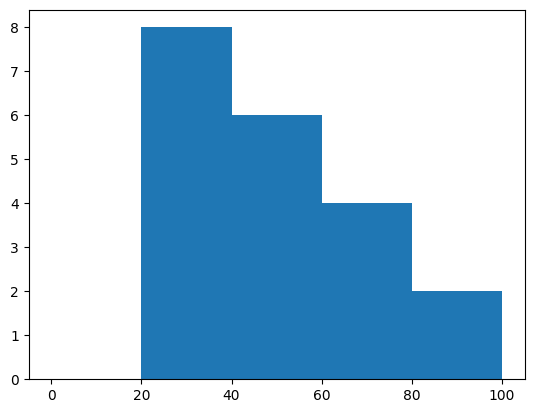

In [19]:
dane = [23,44,21,54,24,65,65,87,43,23,87,43,23,23,44,21,54,34,65,65]   

pl.hist(dane)
pl.show()
print()
pl.hist(dane, bins = 15)
pl.show()
print()
pl.hist(dane, bins=[0,20,40,60,80,100])
pl.show()

### Wykres kołowy

<Axes: ylabel='rozmiar'>

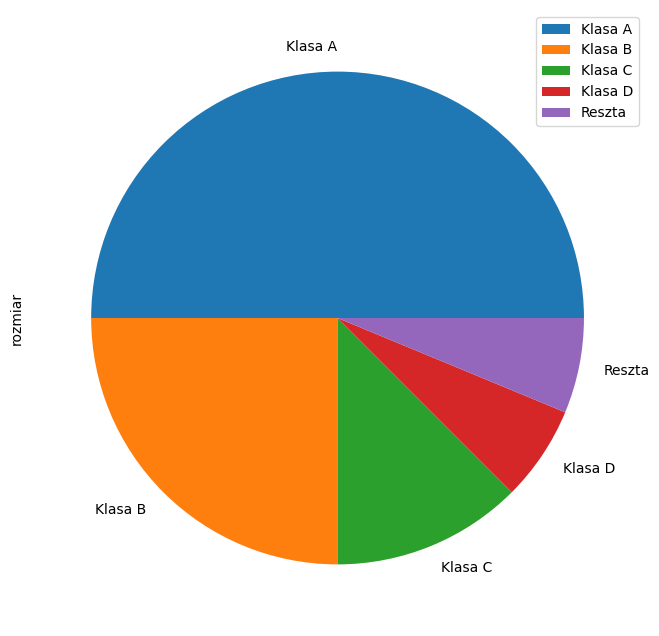

In [20]:
dataFrame = pd.DataFrame({"rozmiar": [2**31,2**30,2**29,2**28,2**28]}, index = ["Klasa A","Klasa B","Klasa C","Klasa D","Reszta"])
dataFrame.plot.pie(y='rozmiar', figsize=(8, 8))